# CNN
This notebook was used to train a CNN for the ASL fingerspelling task.

## Setup
In this section all the necessary libraries are imported.

In [2]:
%pip install multidict==6.0.4
%pip install fiftyone
%pip install kornia

  Using cached multidict-6.0.4-cp312-cp312-linux_x86_64.whl
  Attempting uninstall: multidict
    Found existing installation: multidict 6.3.2
    Uninstalling multidict-6.3.2:
      Successfully uninstalled multidict-6.3.2
Note: you may need to restart the kernel to use updated packages.
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.13.1
    Uninstalling typing_extensions-4.13.1:
      Successfully uninstalled typing_extensions-4.13.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --upgrade --force-reinstall -r requirements.txt

  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiohttp-3.11.16-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached asttokens-3.0.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached charset_normalizer-3.4.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (35 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached debugpy-1.8.13-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.3 kB)
  Using cached decorator-5.2.

In [4]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


And the necessary imports are executed.

In [1]:
import torch.nn as nn
import torchvision.models as visionmodels

import os

# Our own modules
import models.sweep_helper as sweep_helper


from datapipeline.asl_image_data_module import ASLImageDataModule, DEFAULT_TRANSFORMS
from models.asl_model import ASLModel
from models.training import sweep, train_model

INFO:fiftyone.zoo.datasets:Downloading split 'train' to 'C:\Users\kybur\fiftyone\open-images-v7\train' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading existing dataset 'open-images-v7-train-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'open-images-v7-train-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to 'C:\Users\kybur\fiftyone\open-images-v7\validation' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading existing dataset 'open-images-v7-validation-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'open-images-v7-validation-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Downloading split 'test' to 'C:\Users\kybur\fiftyone\open-images-v7\test' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'test' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'test' is sufficient


Loading existing dataset 'open-images-v7-test-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'open-images-v7-test-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Downloading split 'train' to 'C:\Users\kybur\fiftyone\open-images-v7\train' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading existing dataset 'open-images-v7-train-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'open-images-v7-train-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to 'C:\Users\kybur\fiftyone\open-images-v7\validation' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading existing dataset 'open-images-v7-validation-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'open-images-v7-validation-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Downloading split 'test' to 'C:\Users\kybur\fiftyone\open-images-v7\test' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'test' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'test' is sufficient


Loading existing dataset 'open-images-v7-test-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'open-images-v7-test-1000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [2]:
os.environ["WANDB_NOTEBOOK_NAME"] = "cnn.ipynb"

## Preprocessing
No general data preprocessing is necessary, however there will be random transforms applied to the images during training according to the transforms that are passed to the data module.

In [3]:
PATH = "/exchange/dspro2/silent-speech/ASL_Pictures_Dataset"

In [4]:
datamodule = ASLImageDataModule(path=PATH, train_transforms=DEFAULT_TRANSFORMS.TRAIN, valid_transforms=DEFAULT_TRANSFORMS.VALID, test_transforms=DEFAULT_TRANSFORMS.TEST, val_split_folder="Validation", batch_size=32, num_workers=128)

## Model
This section defines the model architecture.

In [5]:
NUM_CLASSES = 28

In [6]:
class ASLCNN_fixed_layers(nn.Module):
    def __init__(self, kernel_size: int, dropout: float =0.2, hidden_dim: int =128, adaptive_pool_size: int =4):
        super().__init__()
        self.kernel_size = kernel_size
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        self.adaptive_pool_size = adaptive_pool_size
        self.model = nn.Sequential(
            # nn.Conv2d(input_channel, output) output can be chosen freely.
            nn.Conv2d(3, 32, kernel_size=self.kernel_size, stride=1, padding=1),
            nn.ReLU(),            
            nn.MaxPool2d(2),
            
            nn.Conv2d(32, 64, kernel_size=self.kernel_size, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(64, 128, kernel_size=self.kernel_size, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.AdaptiveAvgPool2d((self.adaptive_pool_size, self.adaptive_pool_size)), # To prevent OOM
            nn.Flatten(),
            
            nn.LazyLinear(self.hidden_dim), # Automatic adaptation to output -"compression"
            nn.ReLU(),
            nn.Dropout(self.dropout),
            nn.Linear(self.hidden_dim, NUM_CLASSES),
        )


    def forward(self, x):
        x = self.model(x)
        return x

    # TODO CHECK
    def get_main_params(self):
        yield from self.model.classifier.parameters()

    def get_finetune_params(self):
        yield from self.model.features.parameters()

## Training

In [8]:
DROPOUT = "DROPOUT"
HIDDEN_DIM = "HIDDEN_DIM"
KERNEL_SIZE = "KERNEL_SIZE"
ADAPTIVE_POOL_SIZE = "adaptive_pool_size"

In [9]:
def get_asl_cnn_model(kernel_size:int, dropout:float, hidden_dim:int, adaptive_pool_size:int):
    cnn_model = ASLCNN_fixed_layers(kernel_size=kernel_size, dropout=dropout, hidden_dim=hidden_dim, adaptive_pool_size=adaptive_pool_size)
    print('cnn_model instantiated')
    return cnn_model

def get_cnn_model_from_config(config: dict) -> nn.Module:
    cnn_model = get_asl_cnn_model(config[KERNEL_SIZE], config[DROPOUT], config[HIDDEN_DIM], config[ADAPTIVE_POOL_SIZE])
    print('cnn model from config returned')
    return cnn_model

In [10]:
run_id = 0
SEED = 42

def train_cnn():
    train_model("cnn_3layers", get_cnn_model_from_config, datamodule, get_optimizer=sweep_helper.get_optimizer, seed=SEED)

In [11]:
cnn_sweep_config = {
    "name": "cnn-fixed-layer",
    "method": "bayes",
    "metric": {
        "name": f"{ASLModel.VALID_ACCURACY}",
        "goal": "maximize"
    },
    "early_terminate": {
        "type": "hyperband",
        "min_iter": 5
    },
    "parameters": {
        KERNEL_SIZE: {
            "values": [3, 5]
        },
        DROPOUT: {
            "min": 0.1,
            "max": 0.5
        },
        HIDDEN_DIM: {
            "values": [64, 128, 256]
        },
        ADAPTIVE_POOL_SIZE: {
            "values": [2, 4, 8]
        },
        sweep_helper.OPTIMIZER: {
            "parameters": {
                sweep_helper.TYPE: {
                    "values": [sweep_helper.OptimizerType.RMSPROP,
                              sweep_helper.OptimizerType.ADAMW,]
                },
                sweep_helper.LEARNING_RATE: {
                    "min": 1e-5,
                    "max": 1e-3,
                    "distribution": "log_uniform_values"
                },
                sweep_helper.FINETUNE_LEARNING_RATE: {
                    "min": 1e-7,
                    "max": 1e-5,
                    "distribution": "log_uniform_values"
                },
                sweep_helper.WEIGHT_DECAY: {
                    "min": 0,
                    "max": 1e-3,
                },
                sweep_helper.MOMENTUM: {
                    "min": 0.8,
                    "max": 0.99
                },
            }
        },
        sweep_helper.LEARNING_RATE_SCHEDULER: {
            "parameters": {
                sweep_helper.TYPE: {
                    "values": [
                        sweep_helper.LearningRateSchedulerType.STEP,
                        sweep_helper.LearningRateSchedulerType.EXPONENTIAL
                    ]
                },
                sweep_helper.STEP_SIZE: {"value": 5},
                sweep_helper.GAMMA: {
                    "min": 0.1,
                    "max": 0.9
                }
            }
        }
    }
}


In [12]:
# Uncomment line below to start the sweep
# sweep(sweep_config=cnn_sweep_config, count=20, training_procedure=train_cnn)

## Evaluation
This section contains the evaluation of the selected model. It will load the model from the Weights & Biases run and evaluate it on the test set.

In [13]:
from datapipeline.asl_image_test_data_module import ASLImageTestDataModule
from models.evaluation import Evaluation, show_confusion_matrix
from models.training import PROJECT_NAME, ENTITY_NAME

In [ ]:
architecture = get_asl_cnn_model(3,  0.364547094825029, 256, 4) # actual dropout=5
artifact = "model-3227061t:v3"
name = "cnn-with-fixed-layers-1-eval"
architecture_2 = get_asl_cnn_model(5,  0.4983606180659771, 128, 4)
artifact_2 = "model-uty8qi5z:v3"
name_2 = "cnn-3layers-7-eval"
TEST_PATH = r"/exchange/dspro2/silent-speech/Test_Images/"
assert len(os.listdir(TEST_PATH)) == NUM_CLASSES, "Target directory must have 1 folder per class."

test_datamodule = ASLImageTestDataModule(path=TEST_PATH, num_workers=1)

evaluation = Evaluation(name_2, project=PROJECT_NAME, entity=ENTITY_NAME, model_architecture=architecture_2, artifact=artifact_2, datamodule=test_datamodule)

In [23]:
cnn_results = evaluation()

wandb:   1 of 1 files downloaded.  
You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:397: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.20000000298023224
        test_loss           3.5256593227386475
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/opt/conda/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

epoch,▁
test_accuracy,▁
test_loss,▁
trainer/global_step,▁
epoch,0
test_accuracy,0.2
test_loss,3.52566
trainer/global_step,0


(<Figure size 1000x1000 with 2 Axes>,
 <Axes: title={'center': 'Confusion Matrix CNN'}, xlabel='Predicted label', ylabel='True label'>)

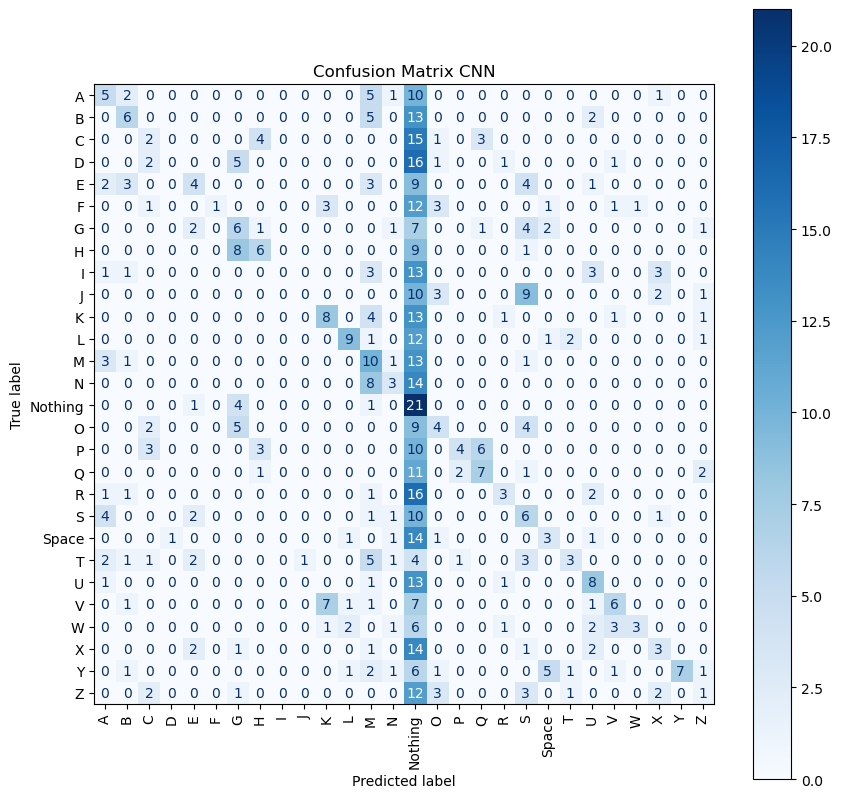

In [24]:
predictions, targets = cnn_results
show_confusion_matrix(targets, predictions, title="Confusion Matrix CNN")

wandb:   1 of 1 files downloaded.  
You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:397: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy          0.166906476020813
        test_loss            4.544436931610107
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/opt/conda/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

epoch,▁
test_accuracy,▁
test_loss,▁
trainer/global_step,▁
epoch,0
test_accuracy,0.16691
test_loss,4.54444
trainer/global_step,0


(<Figure size 1000x1000 with 2 Axes>,
 <Axes: title={'center': 'Confusion Matrix CNN'}, xlabel='Predicted label', ylabel='True label'>)

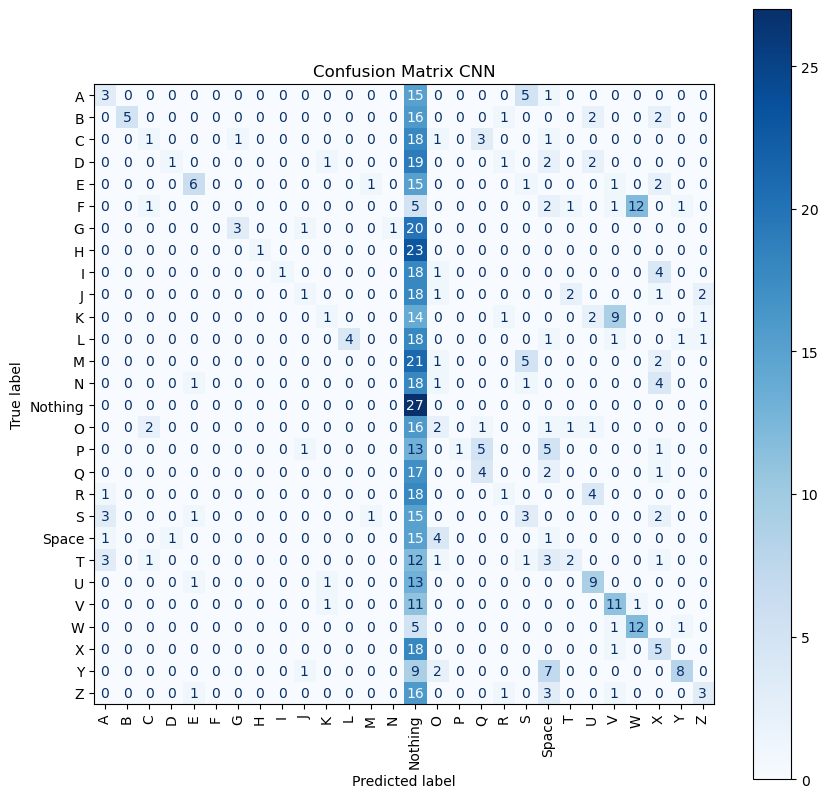

In [20]:
cnn_results_2 = evaluation()
predictions, targets = cnn_results_2
show_confusion_matrix(targets, predictions, title="Confusion Matrix CNN")

In [18]:
evaluation() # Without our own pictures

wandb:   1 of 1 files downloaded.  
You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


/opt/conda/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:397: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9642857313156128
        test_loss           0.08273524045944214
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


epoch,▁
test_accuracy,▁
test_loss,▁
trainer/global_step,▁
epoch,0
test_accuracy,0.96429
test_loss,0.08274
trainer/global_step,0


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


cnn_model instantiated


wandb: Currently logged in as: shse13 (shse13-doe) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  
You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A16') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/opt/conda/lib/python3.12/site-packages/lightning/pytorch/loggers/wandb.py:397: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/lib/python3.12/site-packages/lightning/pyt

Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.2028777003288269
        test_loss           4.0463032722473145
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


/opt/conda/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

epoch,▁
test_accuracy,▁
test_loss,▁
trainer/global_step,▁
epoch,0
test_accuracy,0.20288
test_loss,4.0463
trainer/global_step,0


(<Figure size 1000x1000 with 2 Axes>,
 <Axes: title={'center': 'Confusion Matrix CNN'}, xlabel='Predicted label', ylabel='True label'>)

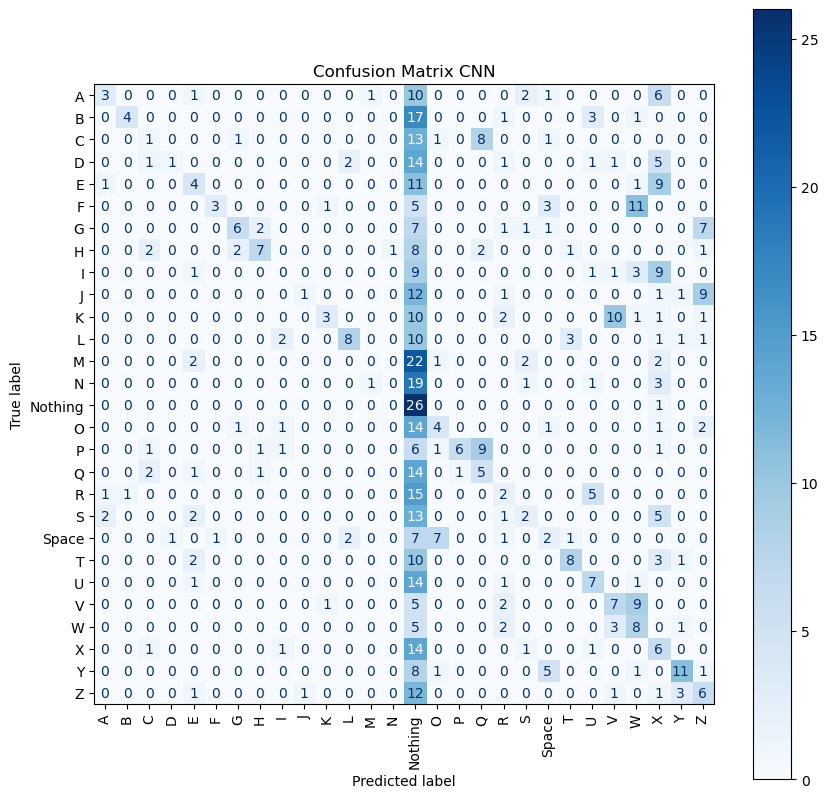

In [14]:
architecture_3 = get_asl_cnn_model(5, 0.22804508530568313, 256, 4)
artifact_3 = "model-1j5e8lhf:v3"
name_3 = "cnn-3layers-20-eval"
TEST_PATH = "/home/jovyan/dspro2/Cropped"
assert len(os.listdir(TEST_PATH)) == NUM_CLASSES, "Target directory must have 1 folder per class."

test_datamodule = ASLImageTestDataModule(path=TEST_PATH, num_workers=1)

evaluation = Evaluation(name_3, project=PROJECT_NAME, entity=ENTITY_NAME, model_architecture=architecture_3, artifact=artifact_3, datamodule=test_datamodule)
cnn_results_3 = evaluation()
predictions, targets = cnn_results_3
show_confusion_matrix(targets, predictions, title="Confusion Matrix CNN")